In [586]:
pay = pd.read_csv('data/interm/pay_cleaned.csv')

In [587]:
appt = pd.read_csv('data/interm/appt_cleaned.csv', low_memory=False)

In [588]:
pat = pd.read_csv('data/interm/patient_cleaned.csv')

In [593]:
inds = pay[pay['PayDate'] == '2020-12-22'].index

In [594]:
pay.drop(inds, inplace=True)

In [596]:
pay.loc[:, 'PayDate'] = pd.to_datetime(pay['PayDate'])

In [137]:
def production(start, end, thresh=None):
    range_ = pay[pay['PayDate'].between(start, end)]
    prod_ = range_.groupby('PayDate')['PayAmt'].sum()
    if thresh:
        prod_ = prod_[prod_ <= thresh]
        plt.plot(prod_.index, prod_.values)
    range_mean = prod_.mean()
    return range_mean, prod_

(1469.8168526170791,
 PayDate
 2015-01-05     974.90
 2015-01-06    1360.59
 2015-01-07    3266.00
 2015-01-08    2468.35
 2015-01-09    2419.95
                ...   
 2020-12-14     976.00
 2020-12-15     312.20
 2020-12-16     903.00
 2020-12-17    1881.15
 2020-12-21    2556.50
 Name: PayAmt, Length: 1452, dtype: float64)

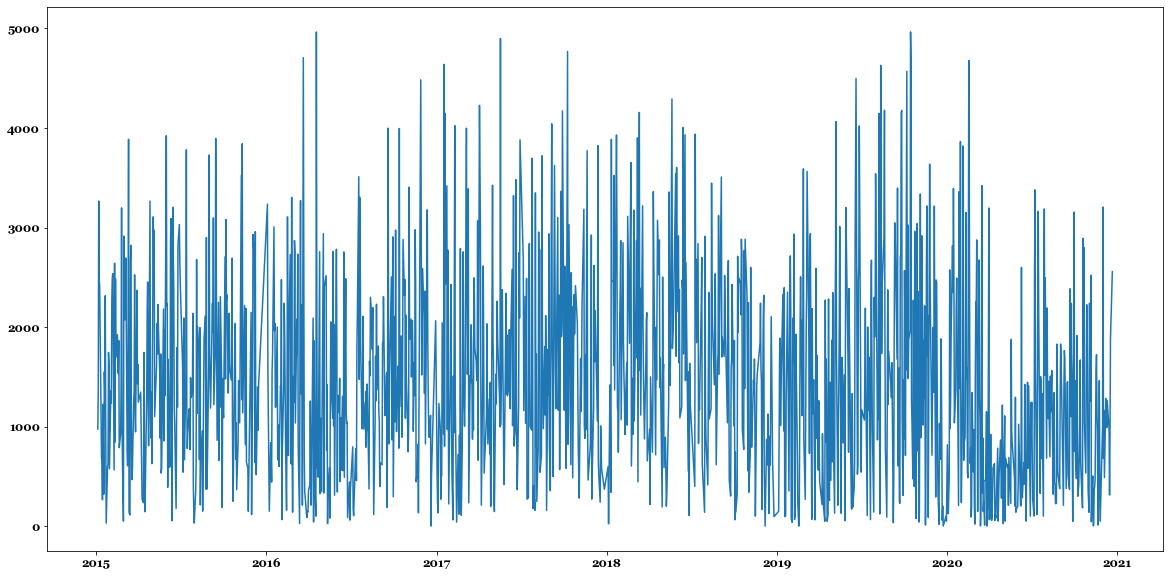

In [139]:
production('2015-01-01', '2021-12-31', thresh=5000)

In [606]:
claims = pd.read_csv('data/claim.csv', engine='python', error_bad_lines=False)

Skipping line 33452: unexpected end of data


In [608]:
claims.head()

,ClaimNum,PatNum,DateService,DateSent,ClaimStatus,DateReceived,PlanNum,ProvTreat,ClaimFee,InsPayEst,InsPayAmt,DedApplied,PreAuthString,IsProsthesis,PriorDate,ReasonUnderPaid,ClaimNote,ClaimType,ProvBill,ReferringProv,RefNumString,PlaceService,AccidentRelated,AccidentDate,AccidentST,EmployRelated,IsOrtho,OrthoRemainM,OrthoDate,PatRelat,PlanNum2,PatRelat2,WriteOff,Radiographs,ClinicNum,ClaimForm,AttachedImages,AttachedModels,AttachedFlags,AttachmentID,CanadianMaterialsForwarded,CanadianReferralProviderNum,CanadianReferralReason,CanadianIsInitialLower,CanadianDateInitialLower,CanadianMandProsthMaterial,CanadianIsInitialUpper,CanadianDateInitialUpper,CanadianMaxProsthMaterial,InsSubNum,InsSubNum2,CanadaTransRefNum,CanadaEstTreatStartDate,CanadaInitialPayment,CanadaPaymentMode,CanadaTreatDuration,CanadaNumAnticipatedPayments,CanadaAnticipatedPayAmount,PriorAuthorizationNumber,SpecialProgramCode,UniformBillType,MedType,AdmissionTypeCode,AdmissionSourceCode,PatientStatusCode,CustomTracking,DateResent,CorrectionType,ClaimIdentifier,OrigRefNum,ProvOrderOverride,OrthoTotalM,ShareOfCost,SecUserNumEntry,SecDateEntry,SecDateTEdit,OrderingReferralNum,DateSentOrig,DateIllnessInjuryPreg,DateIllnessInjuryPregQualifier,DateOther,DateOtherQualifier,IsOutsideLab
0,6,69,1998-06-29,1998-06-30,R,1998-07-27,84,1,195.0,195.0,195.0,0,NaN,N,0001-01-01,NaN,NaN,P,1,0,NaN,0,NaN,0001-01-01,NaN,2,0,0,0001-01-01,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,0001-01-01,0,NaN,0001-01-01,0,3821,0,NaN,0001-01-01,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0001-01-01,0,NaN,NaN,0,0,0,0,0001-01-01,2020-12-22 11:40:10,0,0001-01-01,0001-01-01,0,0001-01-01,0,0
1,13,66,1998-06-29,1998-07-01,R,1998-07-27,13,1,135.0,135.0,129.0,0,NaN,N,0001-01-01,NaN,NaN,P,1,0,NaN,0,NaN,0001-01-01,NaN,2,0,0,0001-01-01,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,0001-01-01,0,NaN,0001-01-01,0,24,0,NaN,0001-01-01,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0001-01-01,0,NaN,NaN,0,0,0,0,0001-01-01,2020-12-22 11:40:10,0,0001-01-01,0001-01-01,0,0001-01-01,0,0
2,14,34,1998-07-01,1998-07-01,R,1998-09-28,11,1,224.0,177.6,172.0,0,NaN,N,0001-01-01,NaN,NaN,P,1,0,NaN,0,NaN,0001-01-01,NaN,2,0,0,0001-01-01,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,0001-01-01,0,NaN,0001-01-01,0,11,0,NaN,0001-01-01,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0001-01-01,0,NaN,NaN,0,0,0,0,0001-01-01,2020-12-22 12:16:32,0,0001-01-01,0001-01-01,0,0001-01-01,0,0
3,15,44,1998-07-01,1998-07-01,R,1998-08-25,32,1,120.0,96.0,61.6,0,NaN,N,0001-01-01,NaN,NaN,P,1,0,NaN,0,NaN,0001-01-01,NaN,2,0,0,0001-01-01,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,0001-01-01,0,NaN,0001-01-01,0,3808,0,NaN,0001-01-01,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0001-01-01,0,NaN,NaN,0,0,0,0,0001-01-01,2020-12-22 11:40:10,0,0001-01-01,0001-01-01,0,0001-01-01,0,0
4,17,157,1998-07-02,1998-07-02,R,1998-08-07,3843,1,1345.0,932.0,904.0,0,NaN,N,0001-01-01,NaN,NaN,P,1,0,NaN,0,NaN,0001-01-01,NaN,2,0,0,0001-01-01,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,0001-01-01,0,NaN,0001-01-01,0,3843,0,NaN,0001-01-01,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,0,0001-01-01,0,NaN,NaN,0,0,0,0,0001-01-01,2020-12-22 11:40:10,0,0001-01-01,0001-01-01,0,0001-01-01,0,0


In [610]:
claimproc = pd.read_csv('data/claimproc.csv', low_memory=False)

In [622]:
claimproc[claimproc['ClaimNum'] == 100]

,ClaimProcNum,ProcNum,ClaimNum,PatNum,ProvNum,FeeBilled,InsPayEst,DedApplied,Status,InsPayAmt,Remarks,ClaimPaymentNum,PlanNum,DateCP,WriteOff,CodeSent,AllowedOverride,Percentage,PercentOverride,CopayAmt,NoBillIns,PaidOtherIns,BaseEst,CopayOverride,ProcDate,DateEntry,LineNumber,DedEst,DedEstOverride,InsEstTotal,InsEstTotalOverride,PaidOtherInsOverride,EstimateNote,WriteOffEst,WriteOffEstOverride,ClinicNum,InsSubNum,PaymentRow,PayPlanNum,ClaimPaymentTracking,SecUserNumEntry,SecDateEntry,SecDateTEdit,DateSuppReceived,DateInsFinalized,IsTransfer
68118,1002,1315,100,78,1,600.0,0.0,0.0,1,0.0,NaN,0,28,1998-11-02,0.0,D2750,-1.0,100,-1,-1.0,0,-1.0,600.0,-1.0,1998-07-29,1998-08-27,0,0.0,-1.0,600.0,-1.0,-1.0,NaN,-1.0,-1.0,0,28,0,0,0,0,0001-01-01,2020-12-22 12:17:28,0001-01-01,0001-01-01,0
116290,99178,0,100,78,1,0.0,0.0,0.0,1,360.0,Conv Ins Payment,99178,28,1998-11-02,0.0,NaN,-1.0,0,-1,-1.0,0,-1.0,0.0,-1.0,1998-07-29,1998-08-27,0,0.0,-1.0,0.0,-1.0,-1.0,NaN,-1.0,-1.0,0,28,0,0,0,0,0001-01-01,2020-12-22 12:17:28,0001-01-01,0001-01-01,0
244459,246583,0,100,78,1,0.0,0.0,0.0,4,-360.0,NaN,0,28,0001-01-01,0.0,NaN,0.0,0,0,0.0,0,0.0,0.0,0.0,1998-07-29,2020-12-22,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,28,0,0,0,1,2020-12-22,2020-12-22 13:10:32,2020-12-22,0001-01-01,1
244460,246584,1315,100,78,1,0.0,0.0,0.0,4,360.0,NaN,0,28,0001-01-01,0.0,D2750,0.0,0,0,0.0,0,0.0,0.0,0.0,1998-07-29,2020-12-22,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,28,0,0,0,1,2020-12-22,2020-12-22 13:10:33,2020-12-22,0001-01-01,1


In [642]:
ins_pay_data = claims.groupby('PatNum')['InsPayAmt'].sum().to_frame().reset_index()

In [644]:
pay_data = pay.groupby('PatNum')['PayAmt'].sum().to_frame().reset_index()

In [633]:
claims.loc[17482, 'InsPayAmt'] = 754

In [650]:
merged_pay = pay_data.merge(ins_pay_data, how='left')

In [656]:
merged_pay.InsPayAmt.fillna(0, inplace=True)

In [657]:
merged_pay['Total'] = merged_pay.PayAmt + merged_pay.InsPayAmt

In [659]:
merged_pay.PayAmt.describe()

count     4853.000000
mean      1393.357742
std       2448.894971
min          0.000000
25%        150.000000
50%        479.600000
75%       1468.000000
max      27413.000000
Name: PayAmt, dtype: float64

In [660]:
merged_pay.Total.describe()

count     4853.000000
mean      2077.759916
std       3026.360510
min          0.000000
25%        295.000000
50%        980.000000
75%       2530.400000
max      27413.000000
Name: Total, dtype: float64

In [662]:
merged_pay.to_csv('merged_pay.csv', index=False)

In [669]:
pat['DateFirstVisit'] = pd.to_datetime(pat['DateFirstVisit'], errors='coerce')

In [707]:
first = pat.loc[:, ['PatNum', 'DateFirstVisit']]

In [712]:
first = first.sort_values('PatNum')

In [715]:
merged = first.merge(maxdates)

In [717]:
merged['tenure'] = merged['Maxdate'] - merged['DateFirstVisit']

In [720]:
merged.tenure = merged.tenure.dt.days/365

In [722]:
merged.tenure.fillna(0.5, inplace=True)

In [725]:
def ufunc(row):
    if row == 0:
        return 0.5
    else: return row

In [727]:
merged.tenure = merged.tenure.apply(ufunc)

In [732]:
final = merged_pay.merge(merged)

In [746]:
(final['PayAmt']/final.tenure).median()

308.94642857142856

In [742]:
final.tenure.describe()

count    3897.000000
mean        4.845673
std         5.161314
min        -4.397260
25%         0.578082
50%         2.846575
75%         7.736986
max        28.945205
Name: tenure, dtype: float64